(<Figure size 1500x1000 with 7 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7f834b5ef2d0>)

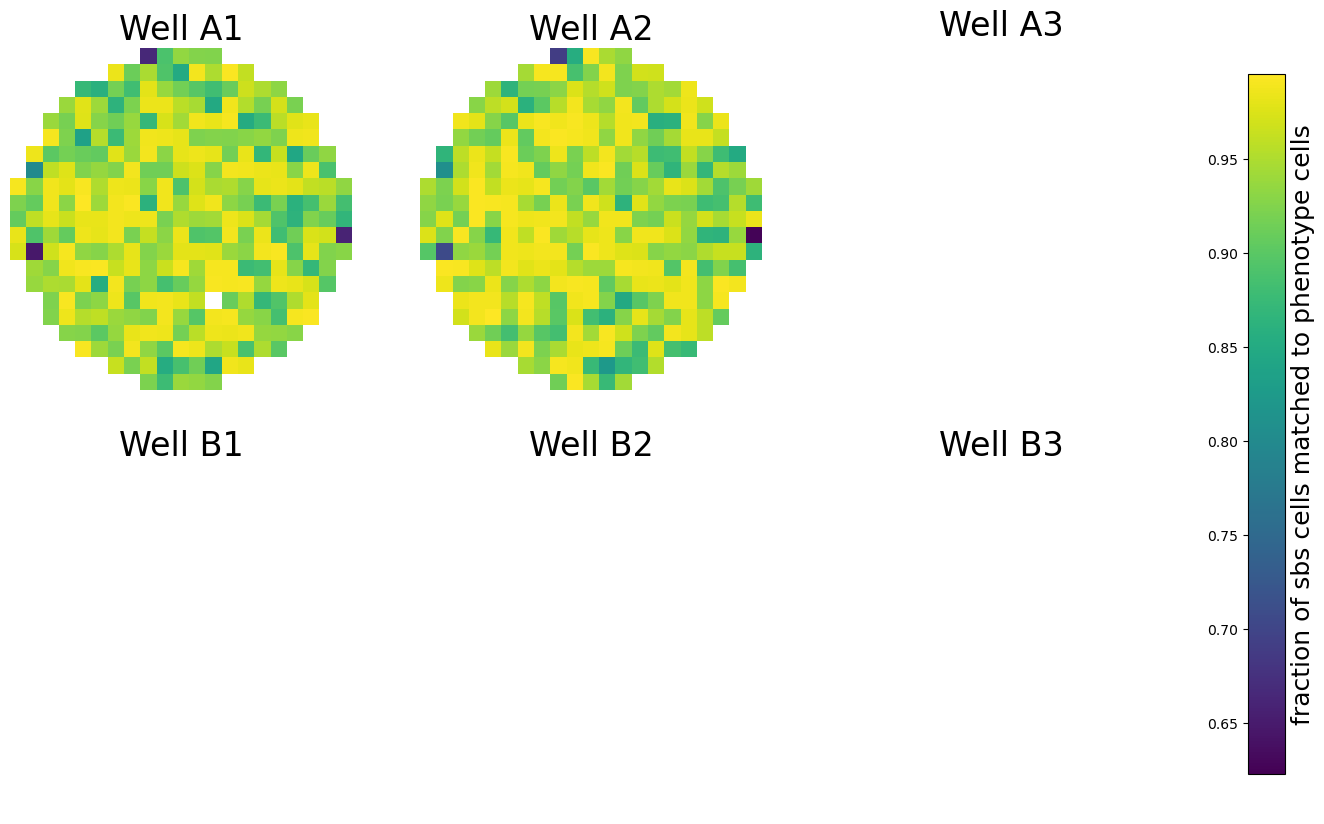

In [1]:
import pandas as pd

from lib.merge.format_merge import identify_single_gene_mappings
from lib.merge.eval_merge import plot_sbs_ph_matching_heatmap, plot_cell_positions

# Load data for evaluating merge
merge_formatted = pd.read_hdf("/lab/barcheese01/rkern/brieflow/example_analysis/analysis_root/merge_process/hdfs/merge_formatted.hdf5")
sbs_cells = pd.read_hdf("/lab/barcheese01/rkern/brieflow/example_analysis/denali_data/cells.hdf5")
phenotype_min_cp = pd.read_hdf("/lab/barcheese01/rkern/brieflow/example_analysis/denali_data/phenotype_cp_min.hdf5")

# Identify single gene mappings in SBS
sbs_cells["mapped_single_gene"] = sbs_cells.apply(
    lambda x: identify_single_gene_mappings(x), axis=1
)

# Evaluate minimal merge data
merge_minimal = merge_formatted[
    ["well", "tile", "site", "cell_0", "cell_1", "distance"]
]

# Eval SBS matching rates
sbs_summary, fig = plot_sbs_ph_matching_heatmap(
    merge_minimal,
    sbs_cells,
    target="sbs",
    shape="6W_sbs",
    return_summary=True,
)
fig

In [ ]:
fig.savefig("test.png")